# Beep Baseball 2023 Stats
Christopher Hunt Jr.

## Imports/Fixing Inconsistencies

In [1]:
import pandas as pd

df = pd.read_csv('2023 WS Stats Values.csv')
df.head()

,,.1,.2,.3,.4,.5,.6,.7,.8,.9
0,Team,Name,G,AB,R,K,PO,BA,K Pct,PO/G
1,Atlanta Chaos,Roy Cody Jr,9,45,16,11,4,0.356,0.244,0.444
2,Atlanta Chaos,Garrick Scott,9,44,23,9,11,0.523,0.205,1.222
3,Atlanta Chaos,Adrian Tamplin,9,38,12,13,6,0.316,0.342,0.667
4,Atlanta Chaos,Dontre Hunt,7,31,22,4,6,0.710,0.129,0.857


In [2]:
# Making the first row the column names
df.columns = df.iloc[0]
df = df.drop(0)
df.head()

,Team,Name,G,AB,R,K,PO,BA,K Pct,PO/G
1,Atlanta Chaos,Roy Cody Jr,9,45,16,11,4,0.356,0.244,0.444
2,Atlanta Chaos,Garrick Scott,9,44,23,9,11,0.523,0.205,1.222
3,Atlanta Chaos,Adrian Tamplin,9,38,12,13,6,0.316,0.342,0.667
4,Atlanta Chaos,Dontre Hunt,7,31,22,4,6,0.710,0.129,0.857
5,Atlanta Chaos,Darnell Jacobs,8,30,10,10,0,0.333,0.333,0.000


In [3]:
# Convert columns to numeric where applicable
numeric_cols = ['G', 'AB', 'R', 'K', 'PO','K Pct', 'PO/G', 'BA']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 1 to 222
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    222 non-null    object 
 1   Name    222 non-null    object 
 2   G       222 non-null    int64  
 3   AB      222 non-null    int64  
 4   R       222 non-null    int64  
 5   K       222 non-null    int64  
 6   PO      222 non-null    int64  
 7   BA      222 non-null    float64
 8   K Pct   222 non-null    float64
 9   PO/G    222 non-null    float64
dtypes: float64(3), int64(5), object(2)
memory usage: 17.5+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

0
Team     0
Name     0
G        0
AB       0
R        0
K        0
PO       0
BA       0
K Pct    0
PO/G     0
dtype: int64

In [7]:
# Creating a Runs per Game column
df['R/G'] = (df['R'] / df['G']).round(3)

In [8]:
df['SO/G'] = (df['K'] / df['G']).round(3)

In [9]:
df.sort_values(by='R/G', ascending=False).head(20)

,Team,Name,G,AB,R,K,PO,BA,K Pct,PO/G,R/G,SO/G
128,Indy Thunder,Cody Jefferes,7,39,34,0,10,0.872,0.000,1.429,4.857,0.000
127,Indy Thunder,Gerald Dycus,7,42,33,1,0,0.786,0.024,0.000,4.714,0.143
25,Bayou City Heat,Tanner Gers,9,52,41,3,0,0.788,0.058,0.000,4.556,0.333
126,Indy Thunder,Zach Buhler,8,48,35,2,22,0.729,0.042,2.750,4.375,0.250
186,San Antonio Jets,David Smith,9,47,38,3,11,0.809,0.064,1.222,4.222,0.333
114,Indy Edge,Nick Mulherin,7,38,28,4,11,0.737,0.105,1.571,4.000,0.571
115,Indy Edge,Corey White,7,38,28,4,2,0.737,0.105,0.286,4.000,0.571
212,Tyler Tigers,Ronald Jordan,7,37,28,3,7,0.757,0.081,1.000,4.000,0.429
85,Gateway Archers,Marc Morris,8,44,32,5,24,0.727,0.114,3.000,4.000,0.625
26,Bayou City Heat,Mike Coughlin,9,51,35,3,25,0.686,0.059,2.778,3.889,0.333


## Offensive Stats

In [10]:
def calculate_offensive_score(stats):
    # Define weights for each offensive metric based on what was seen as most important
    runs_weight = 0.3
    strikeouts_weight = 0.3
    batting_average_weight = 0.3
    strikeout_percentage_weight = 0.3
    runs_per_game_weight = 0.3
    strikeouts_per_game_weight = 0.3
    
    # Calculate offensive score
    offensive_score = (stats['R'] * runs_weight) - \
                      (stats['K'] * strikeouts_weight) + \
                      (stats['BA'] * batting_average_weight) - \
                      (stats['K Pct'] * strikeout_percentage_weight) + \
                      (stats['R/G'] * runs_per_game_weight) - \
                      (stats['SO/G'] * strikeouts_per_game_weight)

    
    
    return offensive_score

df['Offensive_Score'] = df.apply(calculate_offensive_score, axis=1)

### Top 25 Offensive Players

In [11]:
all_team_offense = df[['Team', 'Name', 'Offensive_Score']].sort_values(by='Offensive_Score', ascending=False).head(25)
all_team_offense.reset_index(drop=True, inplace=True)
all_team_offense.index+=1
all_team_offense

,Team,Name,Offensive_Score
1,Bayou City Heat,Tanner Gers,12.8859
2,Indy Thunder,Cody Jefferes,11.9187
3,San Antonio Jets,David Smith,11.8902
4,Indy Thunder,Zach Buhler,11.3436
5,Indy Thunder,Gerald Dycus,11.1999
6,Bayou City Heat,Mike Coughlin,10.8549
7,Bayou City Heat,Brandon Chesser,9.3051
8,Gateway Archers,Marc Morris,9.2964
9,Bayou City Heat,Joe Fleeks,8.8440
10,Tyler Tigers,Ronald Jordan,8.7741


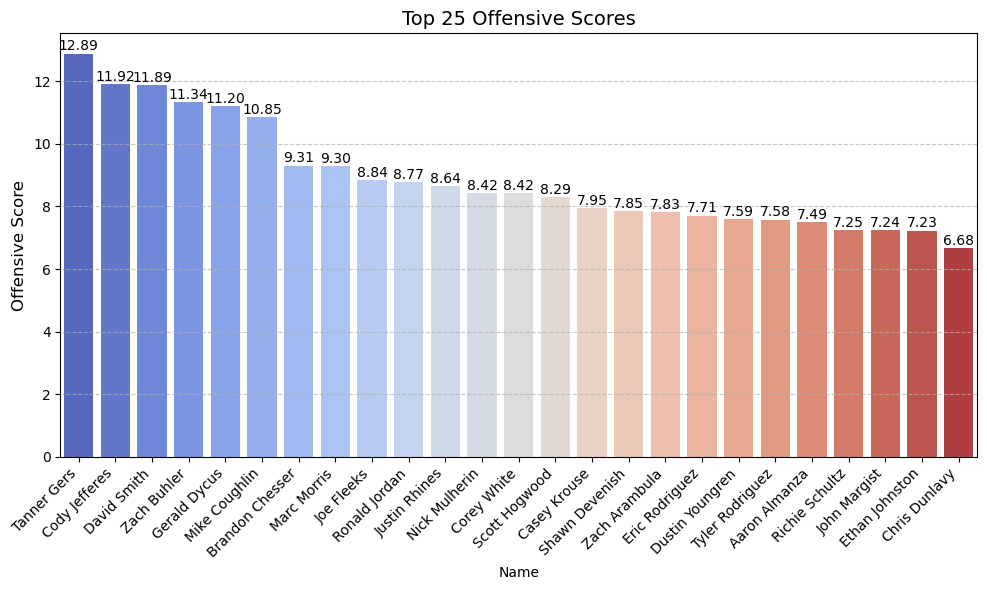

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette
colors = sns.color_palette("coolwarm", len(all_team_offense))

plt.figure(figsize=(10, 6))  # Adjust figure size for optimal readability

# Create the bar plot
barplot = sns.barplot(data=all_team_offense, x='Name', y='Offensive_Score', palette=colors)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Set y-axis label and adjust font size
plt.ylabel('Offensive Score', fontsize=12)

# Set title and adjust font size
plt.title('Top 25 Offensive Scores', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate numbers on top of bars
for index, row in all_team_offense.iterrows():
    barplot.text(index - 1, row['Offensive_Score'] + 0.1, f"{row['Offensive_Score']:.2f}", color='black', ha="center", fontsize=10)

# Adjust plot borders
plt.tight_layout()

# Show plot
plt.show()

## Top 25 Players Ranked by Offensive Scores, Organized by Team

In [13]:
off_team = all_team_offense.value_counts('Team')

In [14]:
# Players on top 25 list per team
off_team

Team
Philly Fire         5
Bayou City Heat     4
Indy Thunder        4
Indy Edge           3
San Antonio Jets    3
Chicago Comets      2
Gateway Archers     2
Boston Renegades    1
Tyler Tigers        1
dtype: int64

## Defensive Stats

In [15]:
def calculate_defensive_score(stats):
    # Define weights for each offensive metric
    putouts_weight = 0.3
    putouts_per_game_weight = 0.3
    
    # Calculate defensive score
    defensive_score = (stats['PO'] * putouts_weight) + \
                      (stats['PO/G'] * putouts_per_game_weight) / (stats['G'] * .25)
    
    return defensive_score

df['Defensive_Score'] = df.apply(calculate_defensive_score, axis=1)

### Top 25 Defensive Players

In [16]:
all_team_defense = df[['Team', 'Name', 'Defensive_Score']].sort_values(by='Defensive_Score', ascending=False).head(25)
all_team_defense.reset_index(drop=True, inplace=True)
all_team_defense.index+=1
all_team_defense

,Team,Name,Defensive_Score
1,Indy Edge,Eric Rodriguez,14.602114
2,San Antonio Jets,Zach Arambula,13.851867
3,Philly Fire,Casey Krouse,11.156250
4,Gateway Archers,Ethan Johnston,10.518750
5,Cleveland Scrappers,Stanley Griffin,9.881250
6,New Jersey Titans,Randy George,9.734743
7,Austin Blackhawks,Darius Sterling,8.925000
8,Minnesota Millers,Evan Van Duyne,8.500000
9,San Antonio Jets,Ricardo Casteneda,8.500000
10,Gateway Archers,Kyle Borah,7.968750


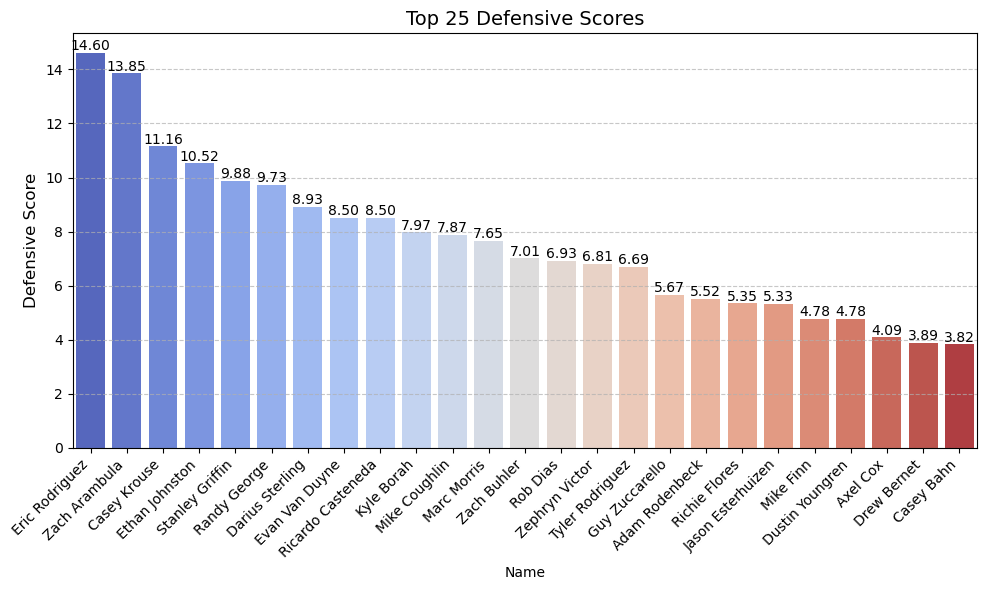

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette
colors = sns.color_palette("coolwarm", len(all_team_defense))

plt.figure(figsize=(10, 6))  # Adjust figure size for optimal readability

# Create the bar plot
barplot = sns.barplot(data=all_team_defense, x='Name', y='Defensive_Score', palette=colors)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Set y-axis label and adjust font size
plt.ylabel('Defensive Score', fontsize=12)

# Set title and adjust font size
plt.title('Top 25 Defensive Scores', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate numbers on top of bars
for index, row in all_team_defense.iterrows():
    barplot.text(index - 1, row['Defensive_Score'] + 0.1, f"{row['Defensive_Score']:.2f}", color='black', ha="center", fontsize=10)

# Adjust plot borders
plt.tight_layout()

# Show plot
plt.show()

## Top 25 Players Ranked by Defensive Scores, Organized by Team

In [18]:
def_team = all_team_defense.value_counts('Team')

In [19]:
def_team

Team
Austin Blackhawks      3
Gateway Archers        3
San Antonio Jets       3
Bayou City Heat        2
Boston Renegades       2
Indy Thunder           2
Philly Fire            2
Braille Bandits        1
Chicago Comets         1
Cleveland Scrappers    1
Indy Edge              1
Minnesota Millers      1
New Jersey Titans      1
Oklahoma Lookouts      1
SGV Panthers           1
dtype: int64

## Top 25 Offensive/Defensive, Organized by Team

In [20]:
total_team = off_team + def_team
total_team.sort_values(ascending=False, inplace=True)
total_team

Team
Philly Fire            7.0
Bayou City Heat        6.0
Indy Thunder           6.0
San Antonio Jets       6.0
Gateway Archers        5.0
Indy Edge              4.0
Boston Renegades       3.0
Chicago Comets         3.0
Austin Blackhawks      NaN
Braille Bandits        NaN
Cleveland Scrappers    NaN
Minnesota Millers      NaN
New Jersey Titans      NaN
Oklahoma Lookouts      NaN
SGV Panthers           NaN
Tyler Tigers           NaN
dtype: float64

## MVP 

In [21]:
def calculate_mvp_score(offensive_score, defensive_score):
    # Define weights for each metric
    offensive_weight = 0.45  # Adjusted weight for offensive metrics
    defensive_weight = 0.55
        
    # Calculate overall MVP score
    mvp_score = (offensive_score * offensive_weight) + (defensive_score * defensive_weight)
    
    return mvp_score

# Calculate offensive score
df['Offensive_Score'] = df.apply(calculate_offensive_score, axis=1)

# Calculate defensive score
df['Defensive_Score'] = df.apply(calculate_defensive_score, axis=1)

# Calculate MVP score
df['MVP_Score'] = calculate_mvp_score(df['Offensive_Score'], df['Defensive_Score'])

# Sort DataFrame by MVP score in descending order
df = df.sort_values(by='MVP_Score', ascending=False)

# Filter out players with less than 8 at-bats and sort by MVP score
df = df[df['AB'] > 8].sort_values(by='MVP_Score', ascending=False)

In [22]:
mvp = df[['Team', 'Name', 'MVP_Score']].sort_values(by='MVP_Score', ascending=False).head()
mvp.reset_index(drop=True, inplace=True)
mvp.index+=1
mvp

,Team,Name,MVP_Score
1,Indy Edge,Eric Rodriguez,11.499718
2,San Antonio Jets,Zach Arambula,11.140542
3,Philly Fire,Casey Krouse,9.715328
4,Bayou City Heat,Mike Coughlin,9.213425
5,Gateway Archers,Ethan Johnston,9.039083


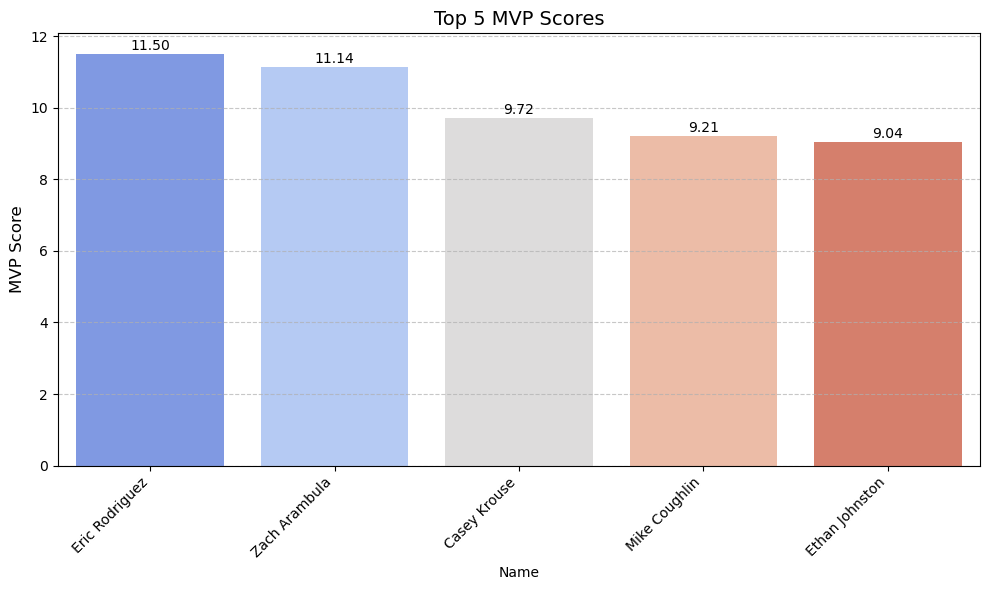

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette
colors = sns.color_palette("coolwarm", len(mvp))

plt.figure(figsize=(10, 6))  # Adjust figure size for optimal readability

# Create the bar plot
barplot = sns.barplot(data=mvp, x='Name', y='MVP_Score', palette=colors)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Set y-axis label and adjust font size
plt.ylabel('MVP Score', fontsize=12)

# Set title and adjust font size
plt.title('Top 5 MVP Scores', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate numbers on top of bars
for index, row in mvp.iterrows():
    barplot.text(index - 1, row['MVP_Score'] + 0.1, f"{row['MVP_Score']:.2f}", color='black', ha="center", fontsize=10)

# Adjust plot borders
plt.tight_layout()

# Show plot
plt.show()

## Analysis

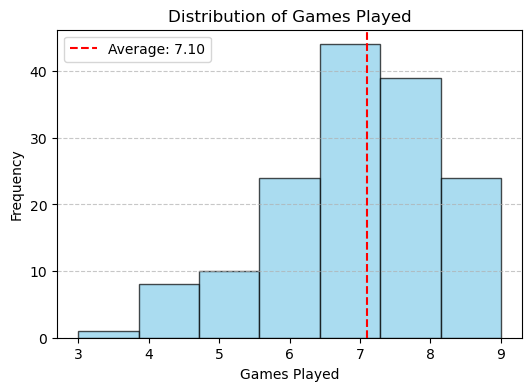

In [24]:
average_games_played = df['G'].mean()

# Plotting
plt.figure(figsize=(6,4))
plt.hist(df['G'], bins=7, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(average_games_played, color='red', linestyle='--', label=f'Average: {average_games_played:.2f}')
plt.xlabel('Games Played')
plt.ylabel('Frequency')
plt.title('Distribution of Games Played')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
# Calculate quartiles
q1 = np.percentile(df['BA'], 25)
q2 = np.percentile(df['BA'], 50)  # Median
q3 = np.percentile(df['BA'], 75)

# Plotting
plt.figure(figsize=(6,4))
plt.hist(df['BA'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(q1, color='green', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='purple', linestyle='--', label=f'Median: {q2:.2f}')
plt.axvline(q3, color='orange', linestyle='--', label=f'Q3: {q3:.2f}')
plt.xlabel('Batting Average')
plt.ylabel('Frequency')
plt.title('Distribution of Batting Avg')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NameError: name 'np' is not defined

In [ ]:
# Calculate quartiles for runs
q1_runs = np.percentile(df['R'], 25)
q2_runs = np.percentile(df['R'], 50)  # Median
q3_runs = np.percentile(df['R'], 75)

# Plotting for Runs
plt.figure(figsize=(6, 4))
plt.hist(df['R'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
#plt.axvline(casey, color='blue', linestyle='--', label=f'Casey Krouse: {casey:.2f}')
plt.axvline(q1_runs, color='green', linestyle='--', label=f'Q1: {q1_runs:.2f}')
plt.axvline(q2_runs, color='purple', linestyle='--', label=f'Median: {q2_runs:.2f}')
plt.axvline(q3_runs, color='orange', linestyle='--', label=f'Q3: {q3_runs:.2f}')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title('Distribution of Runs')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Calculate quartiles for putouts
q1_putouts = np.percentile(df['PO'], 25)
q2_putouts = np.percentile(df['PO'], 50)  # Median
q3_putouts = np.percentile(df['PO'], 75)

# Plotting for Putouts
plt.figure(figsize=(6, 4))
plt.hist(df['PO'], bins='auto', color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(q1_putouts, color='green', linestyle='--', label=f'Q1: {q1_putouts:.2f}')
plt.axvline(q2_putouts, color='purple', linestyle='--', label=f'Median: {q2_putouts:.2f}')
plt.axvline(q3_putouts, color='orange', linestyle='--', label=f'Q3: {q3_putouts:.2f}')
plt.xlabel('Putouts')
plt.ylabel('Frequency')
plt.title('Distribution of Putouts')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Calculate quartiles for R/G
q1_rpg = np.percentile(df['R/G'], 25)
q2_rpg = np.percentile(df['R/G'], 50)  # Median
q3_rpg = np.percentile(df['R/G'], 75)

# Plotting for R/G
plt.figure(figsize=(6, 4))
plt.hist(df['R/G'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(q1_rpg, color='green', linestyle='--', label=f'Q1: {q1_rpg:.2f}')
plt.axvline(q2_rpg, color='purple', linestyle='--', label=f'Median: {q2_rpg:.2f}')
plt.axvline(q3_rpg, color='orange', linestyle='--', label=f'Q3: {q3_rpg:.2f}')
plt.xlabel('Runs per Game')
plt.ylabel('Frequency')
plt.title('Distribution of Runs per Game')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()